In [35]:
import json
import numpy as np

In [88]:
with open('writeConcernTest.json') as fin:
    data = json.load(fin)

In [105]:
result = {}
percentile = 75
for key in data:
    result[key] = []
    for subKey in data[key]:
        print(f'{key}{subKey:5}: {np.percentile(data[key][subKey], percentile).round(3):10.3f} {np.median(data[key][subKey]).round(3):10.3f} {np.std(data[key][subKey]).round(3):10.3f} {np.max(data[key][subKey]).round(3):10.3f} {np.min(data[key][subKey]).round(3):10.3f}')    
        threshold = np.percentile(data[key][subKey], percentile)
        result[key].append(np.mean(
            list(filter(lambda x : x < threshold, data[key][subKey]))
        ))

W1J016B  :     10.253      6.809     15.867    228.466      3.948
W1J0512B :      9.433      6.622     16.054    218.549      4.065
W1J01024B:      9.021      6.559     12.356    111.372      4.187
W1J04096B:     10.411      7.232     14.087    221.127      4.414
WMJ016B  :     12.517      8.884     19.812    294.883      5.388
WMJ0512B :     11.142      8.350     13.621    225.763      5.272
WMJ01024B:     11.203      8.340     20.654    399.459      5.444
WMJ04096B:     11.490      8.665      9.532    104.331      5.847
W3J016B  :     13.061     10.575     15.693    226.154      6.609
W3J0512B :     14.076     10.749     23.522    410.361      6.971
W3J01024B:     13.061     10.218     12.463    226.608      7.122
W3J04096B:     12.897      9.993     18.577    372.746      6.855
W1J116B  :     43.602     32.985     29.291    345.913     20.488
W1J1512B :     47.602     38.137     66.171   1010.487     18.993
W1J11024B:     49.448     40.811     40.833    619.329     20.120
W1J14096B:

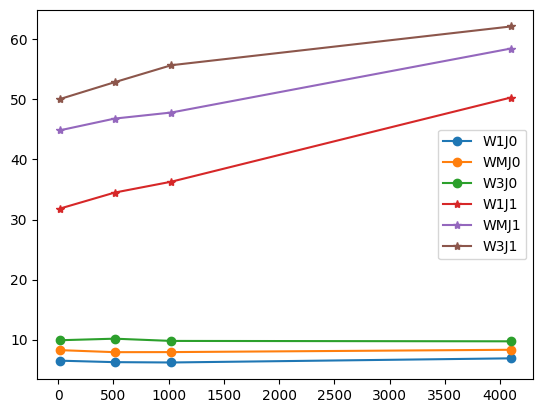

In [90]:
from matplotlib import pyplot as plt
x = [16, 512, 1024, 4096]
for key in result:
    marker = 'o' if 'J0' in key else '*'
    plt.plot(x, result[key], label=key, marker=marker)
    
plt.legend()
plt.show()

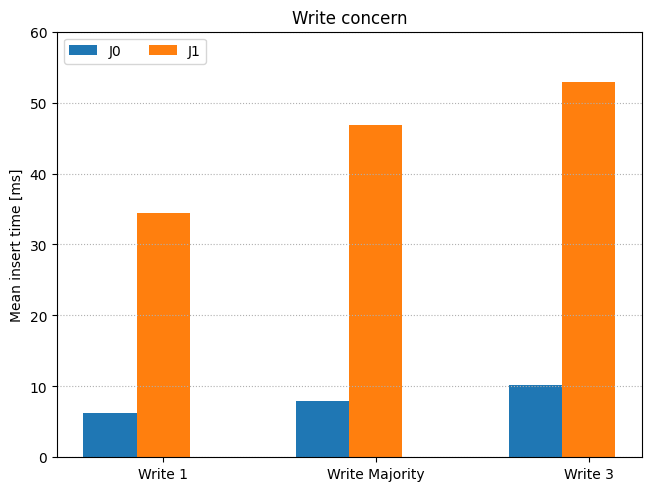

In [133]:
writes = ("Write 1", "Write Majority", "Write 3")
journals = {
    'J0': [],
    'J1': [],
}
for key in result:
    if 'J0' in key:
        journals['J0'].append(result[key][1])
    else:
        journals['J1'].append(result[key][1])
        
x = np.arange(len(writes))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in journals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean insert time [ms]')
ax.set_title('Write concern')
ax.set_xticks(x + width, writes)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 60)
plt.grid(linestyle='dotted', axis='y')

plt.savefig('plot.pdf', format='pdf')
plt.savefig('plot.svg', format='svg')
plt.show()
